In [ ]:
import os
import numpy as np
from dtw import dtw
from tqdm import tqdm
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
def similarity_DTW(s1, s2):
    ratio = 100 # 设定的放缩系数，避免数据的相似度过于集中
    euclidean_norm = lambda x, y: np.abs(ratio * (x - y))
    d, cost_matrix, acc_cost_matrix, path = dtw(s1, s2, dist=euclidean_norm)
    score = 1 - np.tanh(d)  # 相似度的评分【0,1】 0： 完全不同， 1： 完全相同
    return score

print("Test")

## 1. Cluster 的聚类结果

In [5]:
DBA_cluster = np.load("./processing/DBA_wave.pkl", allow_pickle=True)
DBA_clustering_heatmap = np.zeros((len(DBA_cluster), len(DBA_cluster)))
id_list = list(DBA_cluster.keys())
for i, id in enumerate(tqdm(id_list)):
    s1 = DBA_cluster[id]
    for j in range(0, i+1):
        id_2 = id_list[j]
        s2 = DBA_cluster[id_2]
        score = similarity_DTW(s1, s2)
        DBA_clustering_heatmap[i][j] = score
        DBA_clustering_heatmap[j][i] = score
data_frame = pd.DataFrame(DBA_clustering_heatmap)
print(data_frame)

print(id_list)
cluster_id = ["ClusterID{}".format(x) for x in id_list]
print(cluster_id)
cluster_result = data_frame.rename(index=dict(zip(range(len(cluster_id)), cluster_id)), columns=dict(zip(range(len(cluster_id)), cluster_id)))
print(cluster_result)
# print(data_frame)

# metric数据度量方法, method计算聚类的方法
# standard_scale标准维度（0：行或1：列即每行或每列的含义，减去最小值并将每个维度除以其最大值）
sns.clustermap(cluster_result)
# Normalize 正则化
# sns.clustermap(cluster_result, z_score=1)
plt.savefig("./pdf/cluster_heatmap.pdf")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './processing/DBA_wave.pkl'

## 2.选择top-10作为cluster谱聚类的结果

          0         1         2         3         4         5         6   \
0   1.000000  0.819568  0.784662  0.735119  0.822707  0.762324  0.778819   
1   0.819568  1.000000  0.800209  0.796791  0.836836  0.791363  0.732250   
2   0.784662  0.800209  1.000000  0.856460  0.910801  0.856906  0.846494   
3   0.735119  0.796791  0.856460  1.000000  0.841369  0.891513  0.781899   
4   0.822707  0.836836  0.910801  0.841369  1.000000  0.832287  0.799139   
5   0.762324  0.791363  0.856906  0.891513  0.832287  1.000000  0.821936   
6   0.778819  0.732250  0.846494  0.781899  0.799139  0.821936  1.000000   
7   0.747826  0.791026  0.870978  0.823055  0.835635  0.826645  0.749881   
8   0.801596  0.773296  0.892216  0.861190  0.831098  0.830420  0.827351   
9   0.762544  0.773342  0.839620  0.849434  0.832049  0.834022  0.818345   
10  0.642714  0.618779  0.828197  0.745540  0.766758  0.664217  0.632287   
11  0.618761  0.625805  0.788779  0.725807  0.722970  0.601644  0.615687   
12  0.589803

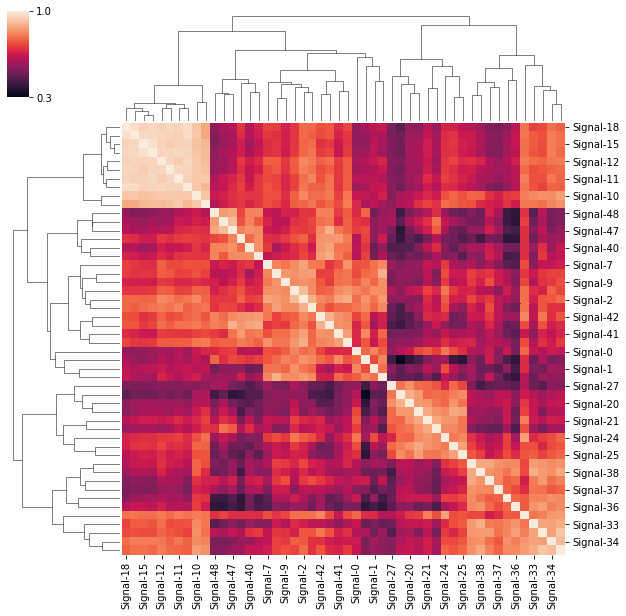

In [5]:
top_cluster_wave_path = "./processing/top_cluater_wave__fid_data.pkl"
wave_clusters_id_feature_data_path = "./processing/wave_clusters_id_feature_data.pkl"

top_cluster_wave = np.load(top_cluster_wave_path, allow_pickle=True)
wave_cluster_wave = np.load(wave_clusters_id_feature_data_path, allow_pickle=True)
# print(wave_cluster_wave)
# print(top_cluster_wave)
cluster_id_list = top_cluster_wave.keys()
feature_ids = []
for c_id in cluster_id_list:
    for f_id, _score in top_cluster_wave[c_id]:
        _tmp_data = wave_cluster_wave[c_id]
        _data, _ids = zip(*_tmp_data)
        fid_data_dict = dict(zip(_ids, _data))
        data = fid_data_dict[f_id]
        feature_ids.append((data, c_id))

# print(feature_ids)

length = len(feature_ids)
heat_map = np.zeros((length, length))
for i in range(length):
    s1, c_id_a = feature_ids[i]
    for j in range(0, i+1):
        s2, c_id_2 = feature_ids[j] 
        score = similarity_DTW(s1, s2)
        heat_map[i][j] = score
        heat_map[j][i] = score    

data_frame = pd.DataFrame(heat_map)
print(data_frame)
# 命名的差异
# cluster_id = []
# cluster_count = {}
# for _, c_id in feature_ids:
#     if c_id not in cluster_count.keys():
#         cluster_count[c_id] = 0
#     name = "ClusterID{}_{}".format(c_id, cluster_count[c_id])
#     cluster_count[c_id] += 1
#     cluster_id.append(name)
cluster_id = []
for x in range(0, length):
    cluster_id.append("Signal-{}".format(x))
print(cluster_id)
cluster_result = data_frame.rename(index=dict(zip(range(len(cluster_id)), cluster_id)), columns=dict(zip(range(len(cluster_id)), cluster_id)))
# print(cluster_result)
# print(data_frame)

# metric数据度量方法, method计算聚类的方法
# standard_scale标准维度（0：行或1：列即每行或每列的含义，减去最小值并将每个维度除以其最大值）
sns.clustermap(cluster_result, vmin = 0.0, vmax=1.0,cbar_kws={"ticks":[0.3,1]})
# Normalize 正则化
# sns.clustermap(cluster_result, z_score=1)
plt.savefig("./pdf/cluster_heatmap_top.pdf")
plt.show()

